# İkili Değişkenli Korelasyon Analizi

**Amaç:** Mehmet'in stresi ile İrem'in tepkiselliği arasındaki ilişkiyi Spearman korelasyon analizi ile incelemek.

## 📚 Teorik Altyapı

### Spearman Korelasyon Katsayısı

Spearman korelasyon katsayısı (ρ), iki değişkenin **sıralamaları** arasındaki monotonik ilişkiyi ölçer.

**Formül:**

$$\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}$$

**Değişkenler:**
- $d_i$: Her gözlem çifti için sıralama farkları
- $n$: Gözlem sayısı

**Adım adım hesaplama:**

1. **Sıralama:** X ve Y değişkenlerini küçükten büyüğe sırala
2. **Fark:** $d_i = R(X_i) - R(Y_i)$
3. **Kare toplamı:** $\sum d_i^2$
4. **Spearman ρ:** Formülü uygula

### Neden Spearman?

✅ Sıralı (ordinal) verilerle çalışır  
✅ Normal dağılım gerektirmez  
✅ Outlier'lara karşı dayanıklı  
✅ Monotonik ilişkileri yakalar

---

## 🔧 Kurulum ve Kütüphaneler

In [3]:
# ============================================
# KÜTÜPHANE İMPORTLARI
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from scipy import stats

# Klasik akademik renk paleti
RENK_MAVI = '#1f77b4'
RENK_TURUNCU = '#ff7f0e'
RENK_YESIL = '#2ca02c'
RENK_KIRMIZI = '#d62728'
RENK_MOR = '#9467bd'
RENK_KAHVE = '#8c564b'

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("✅ Kütüphaneler yüklendi!")

✅ Kütüphaneler yüklendi!


---

## 📊 Veri Seti

7 günlük gözlem verisi:
- **X (Mehmet'in Stresi):** 1-10 arası öznel stres düzeyi
- **Y (İrem'in Tepkiselliği):** 1-10 arası öznel tepkisellik düzeyi

In [4]:
# ============================================
# VERİ SETİ HAZIRLAMA
# ============================================

gunler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 
          'Cuma', 'Cumartesi', 'Pazar']
mehmet_stres = [9, 3, 6, 8, 2, 7, 4]
irem_tepkisellik = [8, 2, 7, 9, 1, 6, 5]

df_2var = pd.DataFrame({
    'Gün': gunler,
    'Mehmet_Stres': mehmet_stres,
    'Irem_Tepkisellik': irem_tepkisellik
})

print("="*60)
print("VERİ SETİ")
print("="*60)
display(df_2var)
print("="*60)

VERİ SETİ


,Gün,Mehmet_Stres,Irem_Tepkisellik
0,Pazartesi,9,8
1,Salı,3,2
2,Çarşamba,6,7
3,Perşembe,8,9
4,Cuma,2,1
5,Cumartesi,7,6
6,Pazar,4,5


---

## 🧮 Manuel Spearman Hesaplama

Spearman katsayısını adım adım hesaplayalım.

### Adım 1: Sıralama (Ranking)

In [5]:
# Sıralama
df_2var['Mehmet_Rank'] = df_2var['Mehmet_Stres'].rank()
df_2var['Irem_Rank'] = df_2var['Irem_Tepkisellik'].rank()

print("### Sıralamalar:")
display(df_2var[['Gün', 'Mehmet_Stres', 'Mehmet_Rank', 
                  'Irem_Tepkisellik', 'Irem_Rank']])

### Sıralamalar:


,Gün,Mehmet_Stres,Mehmet_Rank,Irem_Tepkisellik,Irem_Rank
0,Pazartesi,9,7.0,8,6.0
1,Salı,3,2.0,2,2.0
2,Çarşamba,6,4.0,7,5.0
3,Perşembe,8,6.0,9,7.0
4,Cuma,2,1.0,1,1.0
5,Cumartesi,7,5.0,6,4.0
6,Pazar,4,3.0,5,3.0


### Adım 2: Fark Hesaplama

$$d_i = R(X_i) - R(Y_i)$$

In [6]:
# Fark hesaplama
df_2var['d'] = df_2var['Mehmet_Rank'] - df_2var['Irem_Rank']
df_2var['d_squared'] = df_2var['d'] ** 2

print("### Farklar ve Kareler:")
display(df_2var[['Gün', 'Mehmet_Rank', 'Irem_Rank', 'd', 'd_squared']])

### Farklar ve Kareler:


,Gün,Mehmet_Rank,Irem_Rank,d,d_squared
0,Pazartesi,7.0,6.0,1.0,1.0
1,Salı,2.0,2.0,0.0,0.0
2,Çarşamba,4.0,5.0,-1.0,1.0
3,Perşembe,6.0,7.0,-1.0,1.0
4,Cuma,1.0,1.0,0.0,0.0
5,Cumartesi,5.0,4.0,1.0,1.0
6,Pazar,3.0,3.0,0.0,0.0


### Adım 3: Kare Toplamı ve Spearman ρ

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

In [7]:
# Toplam ve hesaplama
sum_d_squared = df_2var['d_squared'].sum()
n = len(df_2var)

print(f"### Hesaplamalar:")
print(f"Σd² = {sum_d_squared}")
print(f"n = {n}")
print(f"n³ - n = {n**3 - n}")

# Spearman ρ
rho_manual = 1 - (6 * sum_d_squared) / (n * (n**2 - 1))

print(f"\n### Manuel Hesaplama:")
print(f"ρ = 1 - (6 × {sum_d_squared}) / ({n} × ({n}² - 1))")
print(f"ρ = 1 - {6 * sum_d_squared} / {n * (n**2 - 1)}")
print(f"ρ = {rho_manual:.4f}")

### Hesaplamalar:
Σd² = 4.0
n = 7
n³ - n = 336

### Manuel Hesaplama:
ρ = 1 - (6 × 4.0) / (7 × (7² - 1))
ρ = 1 - 24.0 / 336
ρ = 0.9286


---

## ✅ Scipy ile Doğrulama

Manuel hesaplamamızı scipy kütüphanesiyle doğrulayalım.

In [8]:
# Scipy hesaplama
spearman_corr, spearman_p = spearmanr(mehmet_stres, irem_tepkisellik)
pearson_corr, pearson_p = pearsonr(mehmet_stres, irem_tepkisellik)

print("="*60)
print("KORELASYON SONUÇLARI")
print("="*60)
print(f"✅ Manuel Spearman ρ = {rho_manual:.4f}")
print(f"✅ Scipy Spearman ρ = {spearman_corr:.4f} (p = {spearman_p:.4f})")
print(f"\n📊 Pearson r = {pearson_corr:.4f} (p = {pearson_p:.4f})")
print("="*60)
print("\n🎯 Yorum: Manuel hesaplama ile Scipy sonucu uyuşuyor!")

KORELASYON SONUÇLARI
✅ Manuel Spearman ρ = 0.9286
✅ Scipy Spearman ρ = 0.9286 (p = 0.0025)

📊 Pearson r = 0.9356 (p = 0.0020)

🎯 Yorum: Manuel hesaplama ile Scipy sonucu uyuşuyor!


---

## 📈 Görselleştirme

### Görsel 1: Scatter Plot ve Korelasyon Matrisi

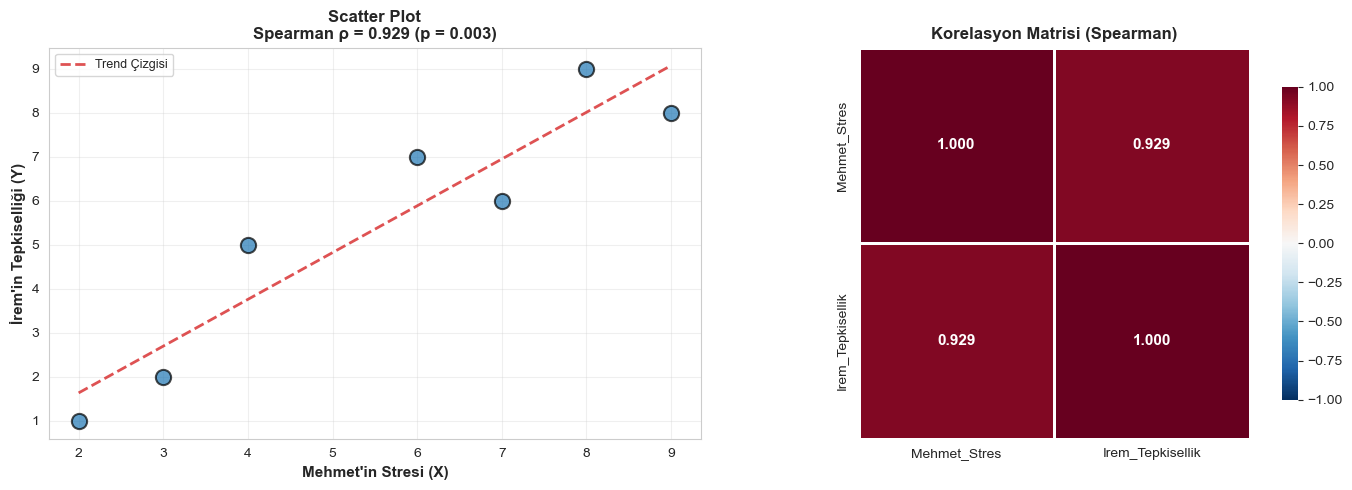


✅ Görsel 1 kaydedildi: gorsel_1_iki_degisken.png


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol: Scatter plot
axes[0].scatter(mehmet_stres, irem_tepkisellik, 
                s=120, c=RENK_MAVI, edgecolors='black', 
                linewidth=1.5, alpha=0.7, zorder=3)

# Trend çizgisi
z = np.polyfit(mehmet_stres, irem_tepkisellik, 1)
p = np.poly1d(z)
x_line = np.linspace(min(mehmet_stres), max(mehmet_stres), 100)
axes[0].plot(x_line, p(x_line), 
             color=RENK_KIRMIZI, linewidth=2, 
             linestyle='--', label='Trend Çizgisi', alpha=0.8)

axes[0].set_xlabel('Mehmet\'in Stresi (X)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('İrem\'in Tepkiselliği (Y)', fontsize=11, fontweight='bold')
axes[0].set_title(f'Scatter Plot\nSpearman ρ = {spearman_corr:.3f} (p = {spearman_p:.3f})', 
                  fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Sağ: Korelasyon matrisi
corr_matrix_2var = df_2var[['Mehmet_Stres', 'Irem_Tepkisellik']].corr(method='spearman')
sns.heatmap(corr_matrix_2var, annot=True, fmt='.3f', 
            cmap='RdBu_r', center=0, square=True, 
            linewidths=2, cbar_kws={"shrink": 0.8}, 
            ax=axes[1], vmin=-1, vmax=1,
            annot_kws={'size': 11, 'weight': 'bold'})
axes[1].set_title('Korelasyon Matrisi (Spearman)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('gorsel_1_iki_degisken.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Görsel 1 kaydedildi: gorsel_1_iki_degisken.png")
